In [1]:
pip install langdetect


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install deep_translator


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install emoji


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install numpy==1.26.4


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importing Libraries

In [6]:
#1. Import Required Libraries
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from spellchecker import SpellChecker
from bs4 import BeautifulSoup
from langdetect import detect
from deep_translator import GoogleTranslator
import emoji
from wordcloud import WordCloud

In [7]:
# Download necessary resources
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kuwar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kuwar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kuwar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Loading Dataset

In [9]:
# Load dataset
df = pd.read_csv("Customer_Feedback_Data.csv") # Update file path if needed

In [10]:
df.head()

,asin,product_name,ratings,reviews,helpful,date,target,text
0,B07XC6WRJQ,"Sparkling ICE Sparkling Water, Variety Pack",4,\n\n I’ve been ordering this product monthly ...,378,11-Jul-18,p,\n\n I’ve been ordering this product monthly ...
1,B07XC6WRJQ,"Sparkling ICE Sparkling Water, Variety Pack",5,\n\n I used to drink these Sparkling Ice wate...,331,14-Sep-18,p,\n\n I used to drink these Sparkling Ice wate...
2,B07XC6WRJQ,"Sparkling ICE Sparkling Water, Variety Pack",1,\n\n Update March 2019: I have been a regular...,236,21-May-17,n,\n\n Update March 2019: I have been a regular...
3,B07XC6WRJQ,"Sparkling ICE Sparkling Water, Variety Pack",1,"\n\n I don't drink this myself, I buy it for ...",170,7-Aug-17,n,"\n\n I don't drink this myself, I buy it for ..."
4,B07XC6WRJQ,"Sparkling ICE Sparkling Water, Variety Pack",1,\n\n When I received my package I couldn't be...,125,9-May-18,n,\n\n When I received my package I couldn't be...


In [11]:
df.tail()

,asin,product_name,ratings,reviews,helpful,date,target,text
9995,B000P22TIY,Nautica Voyage By Nautica For Men. Eau De Toil...,5,\n\n Good purchased 100% original!\n\n,0,"January 17, 2017",p,\n\n Good purchased 100% original!\n\n
9996,B000P22TIY,Nautica Voyage By Nautica For Men. Eau De Toil...,5,\n\n If you looking a smell that’s really fre...,0,"November 12, 2017",p,\n\n If you looking a smell that’s really fre...
9997,B000P22TIY,Nautica Voyage By Nautica For Men. Eau De Toil...,5,\n\n Great product!\n\n,0,"September 27, 2014",p,\n\n Great product!\n\n
9998,B000P22TIY,Nautica Voyage By Nautica For Men. Eau De Toil...,5,\n\n Something as economic and so rich .. exc...,0,"February 15, 2013",p,\n\n Something as economic and so rich .. exc...
9999,B000P22TIY,Nautica Voyage By Nautica For Men. Eau De Toil...,5,\n\n nice\n\n,0,"October 14, 2014",p,\n\n nice\n\n


In [12]:
pip install deep-translator


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Data Preprocessing / Cleaning

In [14]:
#2. Text Cleaning (Remove HTML, Special Characters, and URLs)
def cleaned_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Remove URLs
    text = re.sub(r"[^A-Za-z\s]", "", text)  # Remove special characters & numbers
    text = emoji.replace_emoji(text, replace="")  # Remove emojis
    text = text.lower()  # Convert to lowercase
    return text

#  Translate non-English text to English
    try:
        translated_text = GoogleTranslator(source='auto', target='en').translate(text)
    except Exception as e:
        print(f"Translation Error: {e}")
        translated_text = text  # Keep original if translation fails

    return translated_text

df["cleaned_text"] = df["text"].apply(cleaned_text)
df.head()


C:\Users\kuwar\AppData\Local\Temp\ipykernel_2892\2825785556.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags


,asin,product_name,ratings,reviews,helpful,date,target,text,cleaned_text
0,B07XC6WRJQ,"Sparkling ICE Sparkling Water, Variety Pack",4,\n\n I’ve been ordering this product monthly ...,378,11-Jul-18,p,\n\n I’ve been ordering this product monthly ...,\n\n ive been ordering this product monthly f...
1,B07XC6WRJQ,"Sparkling ICE Sparkling Water, Variety Pack",5,\n\n I used to drink these Sparkling Ice wate...,331,14-Sep-18,p,\n\n I used to drink these Sparkling Ice wate...,\n\n i used to drink these sparkling ice wate...
2,B07XC6WRJQ,"Sparkling ICE Sparkling Water, Variety Pack",1,\n\n Update March 2019: I have been a regular...,236,21-May-17,n,\n\n Update March 2019: I have been a regular...,\n\n update march i have been a regular subs...
3,B07XC6WRJQ,"Sparkling ICE Sparkling Water, Variety Pack",1,"\n\n I don't drink this myself, I buy it for ...",170,7-Aug-17,n,"\n\n I don't drink this myself, I buy it for ...",\n\n i dont drink this myself i buy it for my...
4,B07XC6WRJQ,"Sparkling ICE Sparkling Water, Variety Pack",1,\n\n When I received my package I couldn't be...,125,9-May-18,n,\n\n When I received my package I couldn't be...,\n\n when i received my package i couldnt bel...


In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#  Convert text into numerical representation using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.9, min_df=5, stop_words='english')
text_matrix = vectorizer.fit_transform(df["cleaned_text"])

print("TF-IDF Matrix Shape:", text_matrix.shape)  # Check feature size



TF-IDF Matrix Shape: (10000, 1785)


In [16]:
#3. Tokenization & Stopword Removal
stop_words = set(stopwords.words("english"))

def tokenize_and_remove_stopwords(text):
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

df["cleaned_text"] = df["cleaned_text"].apply(tokenize_and_remove_stopwords)
df.head()

,asin,product_name,ratings,reviews,helpful,date,target,text,cleaned_text
0,B07XC6WRJQ,"Sparkling ICE Sparkling Water, Variety Pack",4,\n\n I’ve been ordering this product monthly ...,378,11-Jul-18,p,\n\n I’ve been ordering this product monthly ...,ive ordering product monthly year past shipmen...
1,B07XC6WRJQ,"Sparkling ICE Sparkling Water, Variety Pack",5,\n\n I used to drink these Sparkling Ice wate...,331,14-Sep-18,p,\n\n I used to drink these Sparkling Ice wate...,used drink sparkling ice waters flavors every ...
2,B07XC6WRJQ,"Sparkling ICE Sparkling Water, Variety Pack",1,\n\n Update March 2019: I have been a regular...,236,21-May-17,n,\n\n Update March 2019: I have been a regular...,update march regular subscriber cases month sp...
3,B07XC6WRJQ,"Sparkling ICE Sparkling Water, Variety Pack",1,"\n\n I don't drink this myself, I buy it for ...",170,7-Aug-17,n,"\n\n I don't drink this myself, I buy it for ...",dont drink buy dad swear would drink gallon of...
4,B07XC6WRJQ,"Sparkling ICE Sparkling Water, Variety Pack",1,\n\n When I received my package I couldn't be...,125,9-May-18,n,\n\n When I received my package I couldn't be...,received package couldnt believe eyes twelve b...


In [17]:
#4. Lemmatization
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(words)

df["cleaned_text"] = df["cleaned_text"].apply(lemmatize_text)
df.head()

,asin,product_name,ratings,reviews,helpful,date,target,text,cleaned_text
0,B07XC6WRJQ,"Sparkling ICE Sparkling Water, Variety Pack",4,\n\n I’ve been ordering this product monthly ...,378,11-Jul-18,p,\n\n I’ve been ordering this product monthly ...,ive ordering product monthly year past shipmen...
1,B07XC6WRJQ,"Sparkling ICE Sparkling Water, Variety Pack",5,\n\n I used to drink these Sparkling Ice wate...,331,14-Sep-18,p,\n\n I used to drink these Sparkling Ice wate...,used drink sparkling ice water flavor every da...
2,B07XC6WRJQ,"Sparkling ICE Sparkling Water, Variety Pack",1,\n\n Update March 2019: I have been a regular...,236,21-May-17,n,\n\n Update March 2019: I have been a regular...,update march regular subscriber case month spa...
3,B07XC6WRJQ,"Sparkling ICE Sparkling Water, Variety Pack",1,"\n\n I don't drink this myself, I buy it for ...",170,7-Aug-17,n,"\n\n I don't drink this myself, I buy it for ...",dont drink buy dad swear would drink gallon of...
4,B07XC6WRJQ,"Sparkling ICE Sparkling Water, Variety Pack",1,\n\n When I received my package I couldn't be...,125,9-May-18,n,\n\n When I received my package I couldn't be...,received package couldnt believe eye twelve bo...


# Exploratory Data Analysis(EDA)

In [19]:
#. N-Gram Analysis (Bigrams & Trigrams)

from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(text, ngram_range=(2, 3), n=10):
    vec = CountVectorizer(ngram_range=ngram_range).fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    return words_freq[:n]

bigrams = get_top_ngrams(df["cleaned_text"], ngram_range=(2, 2))
trigrams = get_top_ngrams(df["cleaned_text"], ngram_range=(3, 3))

print("Top Bigrams:", bigrams)
print("Top Trigrams:", trigrams)

Top Bigrams: [('sparkling ice', 393), ('smell good', 288), ('smell great', 280), ('great price', 242), ('favorite flavor', 221), ('last long', 212), ('love flavor', 200), ('love drink', 152), ('taste great', 151), ('smell like', 144)]
Top Trigrams: [('love sparkling ice', 63), ('doesnt last long', 60), ('flavor sparkling ice', 48), ('sparkling ice drink', 44), ('last long time', 42), ('smell really good', 42), ('smell great last', 33), ('local grocery store', 32), ('sparkling ice flavor', 31), ('one favorite flavor', 28)]


In [20]:

# Basic Text Metrics (Word Count, Length, Vocabulary Size)

df["text_length"] = df["cleaned_text"].apply(len)
df["word_count"] = df["cleaned_text"].apply(lambda x: len(x.split()))

print(df[["text_length", "word_count"]].describe())

        text_length   word_count
count  10000.000000  10000.00000
mean      69.651300     10.71550
std       98.081227     14.48965
min        0.000000      0.00000
25%       17.000000      3.00000
50%       40.000000      6.00000
75%       84.000000     13.00000
max     2492.000000    348.00000


In [21]:
#2. Word Clouds (Positive & Negative Sentiments)

In [22]:
# Count number of reviews for each product
product_review_counts = df.groupby("product_name")["reviews"].count().reset_index()
product_review_counts.columns = ["Product Name", "Review Count"]

# Count positive and negative reviews for each product
product_sentiment_counts = df.groupby(["product_name", "target"]).size().unstack(fill_value=0).reset_index()
product_sentiment_counts.columns = ["Product Name", "Negative Count", "Positive Count"]

# Merge the counts into one dataframe
final_counts = pd.merge(product_review_counts, product_sentiment_counts, on="Product Name", how="left")

# Rearrange product order (swap positions 0 and 1)
final_counts = final_counts.iloc[::-1].reset_index(drop=True)

# Display the results
print(final_counts)


                                        Product Name  Review Count  \
0        Sparkling ICE Sparkling Water, Variety Pack          5000   
1  Nautica Voyage By Nautica For Men. Eau De Toil...          5000   

   Negative Count  Positive Count  
0             915            4085  
1             955            4045  


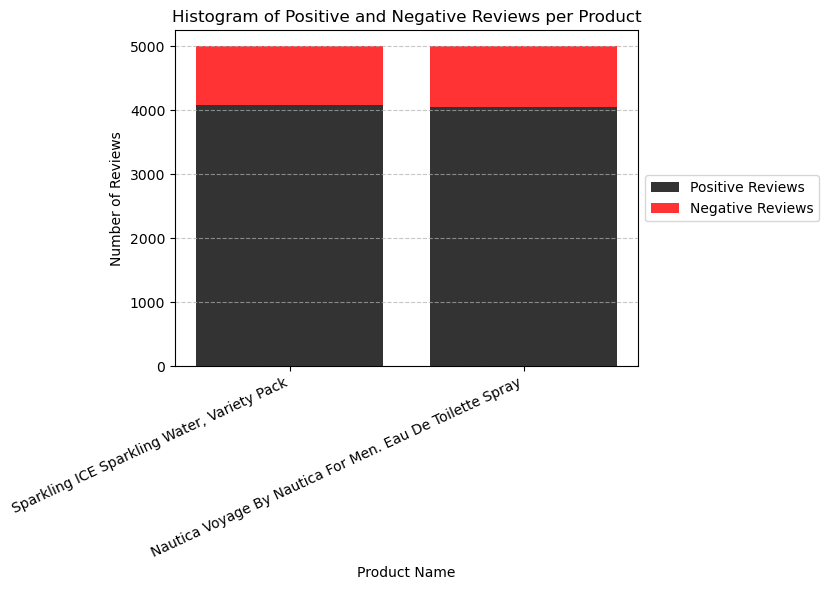

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# DataFrame
final_counts = pd.DataFrame({
    "Product Name": [
        "Sparkling ICE Sparkling Water, Variety Pack",
        "Nautica Voyage By Nautica For Men. Eau De Toilette Spray"
    ],
    "Review Count": [5000, 5000],
    "Negative Count": [915, 955],
    "Positive Count": [4085, 4045]
})

# Optional sorting (if needed)
final_counts_sorted = final_counts.set_index("Product Name").loc[
    ["Sparkling ICE Sparkling Water, Variety Pack",
     "Nautica Voyage By Nautica For Men. Eau De Toilette Spray"]
].reset_index()

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(final_counts_sorted["Product Name"], final_counts_sorted["Positive Count"],
        label="Positive Reviews", color="black", alpha=0.8)
plt.bar(final_counts_sorted["Product Name"], final_counts_sorted["Negative Count"],
        label="Negative Reviews", color="red", alpha=0.8,
        bottom=final_counts_sorted["Positive Count"])

# Labels
plt.xlabel("Product Name")
plt.ylabel("Number of Reviews")
plt.title("Histogram of Positive and Negative Reviews per Product")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=25, ha="right")

# Legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
plt.show()


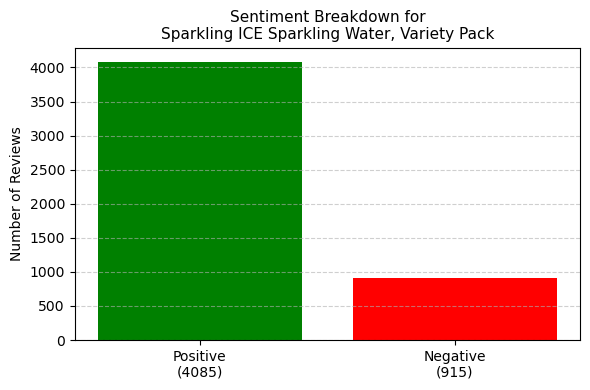

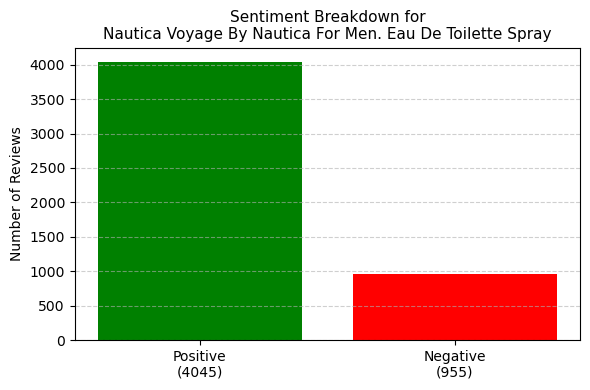

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Final DataFrame with sentiment counts
final_counts = pd.DataFrame({
    "Product Name": [
        "Sparkling ICE Sparkling Water, Variety Pack",
        "Nautica Voyage By Nautica For Men. Eau De Toilette Spray"
    ],
    "Review Count": [5000, 5000],
    "Negative Count": [915, 955],
    "Positive Count": [4085, 4045]
})

# Plot separate bar chart for each product
for idx, row in final_counts.iterrows():
    product = row["Product Name"]
    pos = row["Positive Count"]
    neg = row["Negative Count"]

    # Bar chart
    plt.figure(figsize=(6, 4))
    bars = plt.bar(["Positive", "Negative"], [pos, neg], color=["green", "red"])

    # Replace x-axis labels with sentiment + count
    new_labels = [f"Positive\n({pos})", f"Negative\n({neg})"]
    plt.xticks(ticks=[0, 1], labels=new_labels, fontsize=10)

    plt.title(f"Sentiment Breakdown for\n{product}", fontsize=11)
    plt.ylabel("Number of Reviews")
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()


In [25]:
#Review Count per Rating per Product:

# Create summary table: Review count per product and rating
rating_review_table = df.groupby(["product_name", "ratings"]).size().reset_index(name="Review Count")

# Use actual product names from the dataset
product_order = list(df["product_name"].unique())

# Ensure Sparkling Water comes first
product_order.sort(key=lambda x: 0 if "Sparkling ICE" in x else 1)

# Apply sorting
rating_review_table["product_name"] = pd.Categorical(
    rating_review_table["product_name"],
    categories=product_order,
    ordered=True
)

# Sort table accordingly
rating_review_table = rating_review_table.sort_values(["product_name", "ratings"]).reset_index(drop=True)

# Display final result
print("\nReview Count per Rating per Product:")
display(rating_review_table)



Review Count per Rating per Product:


,product_name,ratings,Review Count
0,"Sparkling ICE Sparkling Water, Variety Pack",1,677
1,"Sparkling ICE Sparkling Water, Variety Pack",2,104
2,"Sparkling ICE Sparkling Water, Variety Pack",3,134
3,"Sparkling ICE Sparkling Water, Variety Pack",4,683
4,"Sparkling ICE Sparkling Water, Variety Pack",5,3402
5,Nautica Voyage By Nautica For Men. Eau De Toil...,1,657
6,Nautica Voyage By Nautica For Men. Eau De Toil...,2,114
7,Nautica Voyage By Nautica For Men. Eau De Toil...,3,184
8,Nautica Voyage By Nautica For Men. Eau De Toil...,4,855
9,Nautica Voyage By Nautica For Men. Eau De Toil...,5,3190


<Figure size 500x400 with 0 Axes>

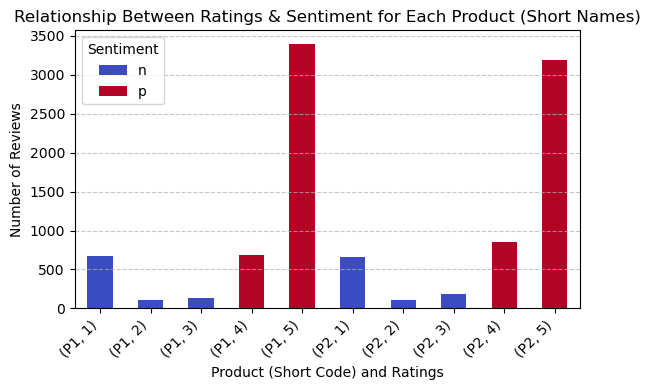

Product Short Codes:
P1: Sparkling ICE Sparkling Water, Variety Pack
P2: Nautica Voyage By Nautica For Men. Eau De Toilette Spray, 100 ml


In [26]:
import matplotlib.pyplot as plt

# Create a mapping from full product names to short notations
unique_products = df["product_name"].unique()
short_labels = {name: f"P{i+1}" for i, name in enumerate(unique_products)}

# Apply the mapping to a new column for labeling
df["product_short"] = df["product_name"].map(short_labels)

# Group by short product label instead of full name
grouped = df.groupby(["product_short", "ratings", "target"]).size().unstack()

# Plot
plt.figure(figsize=(5, 4))
grouped.plot(kind='bar', stacked=True, colormap="coolwarm", figsize=(6, 4))
plt.xlabel("Product (Short Code) and Ratings")
plt.ylabel("Number of Reviews")
plt.title("Relationship Between Ratings & Sentiment for Each Product (Short Names)")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Sentiment")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Optional: Show short code mapping for reference
print("Product Short Codes:")
for full, short in short_labels.items():
    print(f"{short}: {full}")


C:\Users\kuwar\AppData\Local\Temp\ipykernel_2892\528059436.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


<Figure size 1200x600 with 0 Axes>

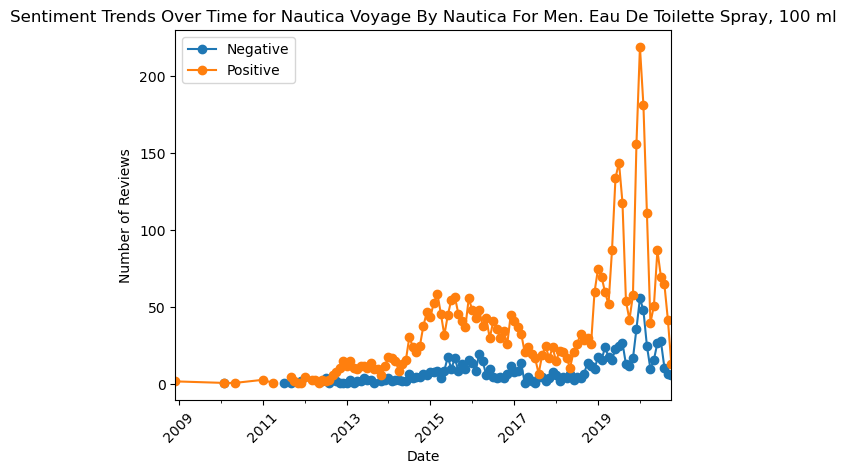

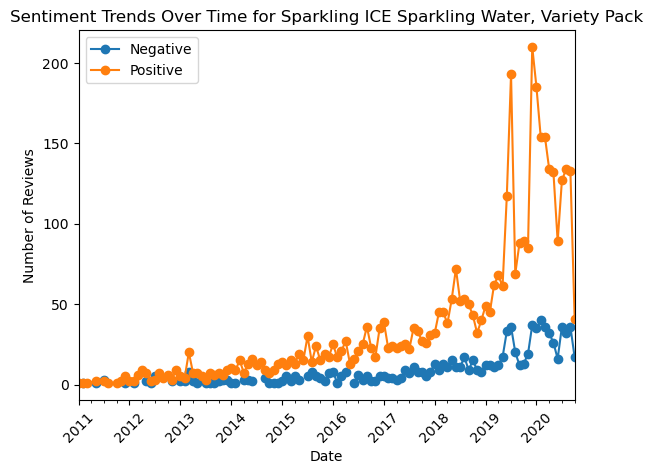

In [51]:
# Sentiment Trends Over Time for Each Product
df['date'] = pd.to_datetime(df['date'], errors='coerce')

plt.figure(figsize=(12, 6))
for product, data in df.groupby("product_name"):
    sentiment_trend = data.groupby(data['date'].dt.to_period("M"))['target'].value_counts().unstack()
    sentiment_trend.plot(marker="o", title=f"Sentiment Trends Over Time for {product}")
    plt.xlabel("Date")
    plt.ylabel("Number of Reviews")
    plt.xticks(rotation=45)
    plt.legend(["Negative", "Positive"])
    plt.show()

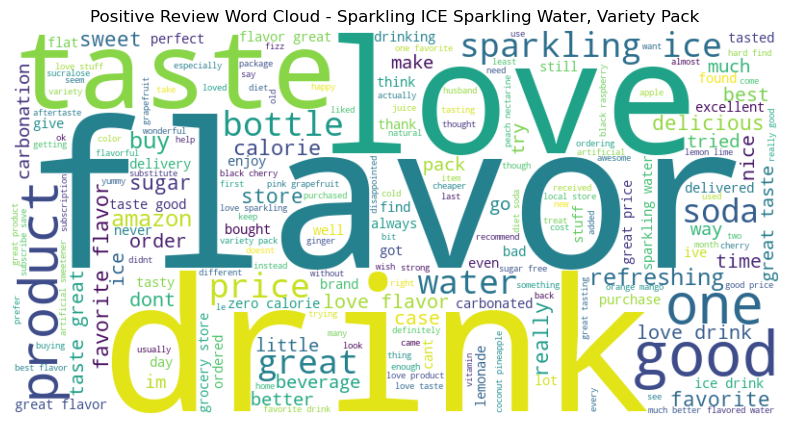

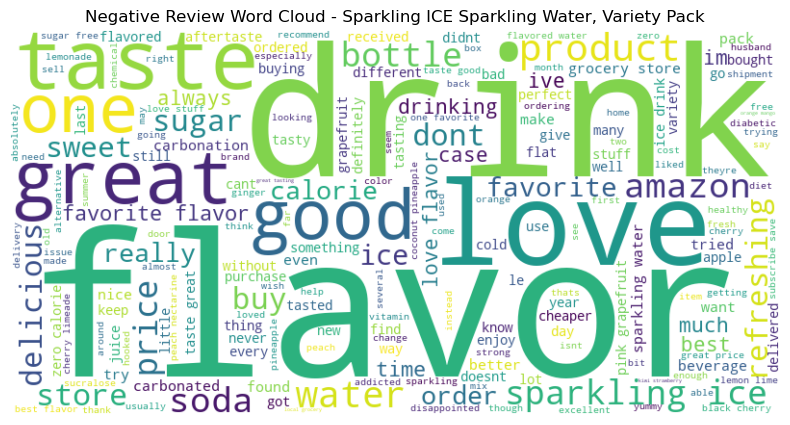

In [87]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and plot word clouds
def plot_wordcloud(text_series, title):
    combined_text = " ".join(text_series.dropna())
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(combined_text)
    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Product name
product1 = "Sparkling ICE Sparkling Water, Variety Pack"

# Filter data for this product
data1 = df[df["product_name"] == product1]

# Separate positive and negative reviews
positive1 = data1[data1["target"] == "Positive"]["cleaned_text"]
negative1 = data1[data1["target"] == "Negative"]["cleaned_text"]

# Plot word clouds
if not positive1.empty:
    plot_wordcloud(positive1, f"Positive Review Word Cloud - {product1}")

if not negative1.empty:
    plot_wordcloud(negative1, f"Negative Review Word Cloud - {product1}")


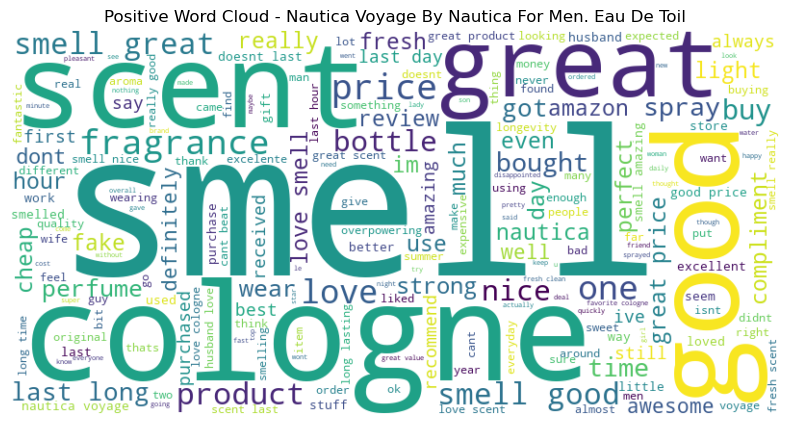

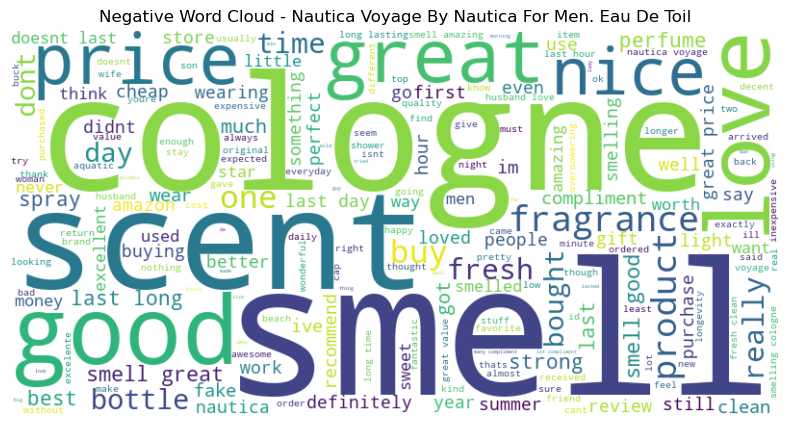

In [89]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(text, title):
    text = " ".join(text.dropna().astype(str))
    if text.strip():
        wc = WordCloud(width=800, height=400, background_color="white").generate(text)
        plt.figure(figsize=(8, 5))
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.title(title)
        plt.tight_layout()
        plt.show()

# Filter data for Nautica Voyage
nautica_df = df[df["product_name"].str.contains("Nautica Voyage", case=False, na=False)]

# Plot positive and negative word clouds
plot_wordcloud(nautica_df[nautica_df["target"] == "Positive"]["cleaned_text"], "Positive Word Cloud - Nautica Voyage By Nautica For Men. Eau De Toil")
plot_wordcloud(nautica_df[nautica_df["target"] == "Negative"]["cleaned_text"], "Negative Word Cloud - Nautica Voyage By Nautica For Men. Eau De Toil")


In [26]:
#6. Most Helpful Reviews Analysis

top_helpful_reviews = df.sort_values(by='helpful', ascending=False).head(10)

print(top_helpful_reviews[['ratings', 'text', 'helpful', 'target']])

      ratings                                               text  helpful  \
0           4  \n\n  I’ve been ordering this product monthly ...      378   
9837        5  \n\n  I'm a 22 year old college student who ha...      349   
1           5  \n\n  I used to drink these Sparkling Ice wate...      331   
9838        1  \n\n  Smells great for 16 bucks that I paid. I...      262   
2           1  \n\n  Update March 2019: I have been a regular...      236   
5003        5  \n\n  I was told by a friend this Cologne  sme...      226   
5000        4  \n\n  This product exceeded my expectations! I...      213   
5001        5  \n\n  This is a terrible knock off.  When I ju...      202   
3           1  \n\n  I don't drink this myself, I buy it for ...      170   
9841        5  \n\n  Longevity is something you search for in...      165   

        target  
0     Positive  
9837  Positive  
1     Positive  
9838  Negative  
2     Negative  
5003  Positive  
5000  Positive  
5001  Positive  

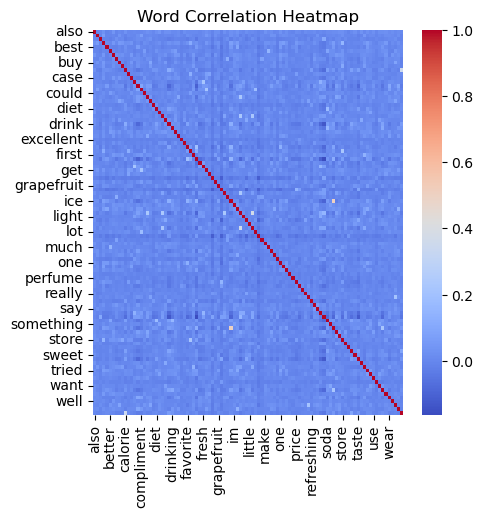

In [57]:
#8. Topic Coherence (Word Correlation Heatmap)

from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns


vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(df["cleaned_text"])

tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

corr_matrix = tfidf_df.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Word Correlation Heatmap")
plt.show()

                                              Product         Word  Frequency
0         Sparkling ICE Sparkling Water, Variety Pack      flavors        729
1         Sparkling ICE Sparkling Water, Variety Pack        drink        638
2         Sparkling ICE Sparkling Water, Variety Pack         soda        438
3         Sparkling ICE Sparkling Water, Variety Pack          ice        301
4         Sparkling ICE Sparkling Water, Variety Pack     calories        289
5         Sparkling ICE Sparkling Water, Variety Pack         diet        156
6         Sparkling ICE Sparkling Water, Variety Pack  carbonation        147
7         Sparkling ICE Sparkling Water, Variety Pack   grapefruit        142
8         Sparkling ICE Sparkling Water, Variety Pack      calorie        133
9         Sparkling ICE Sparkling Water, Variety Pack       ginger        113
10  Nautica Voyage By Nautica For Men. Eau De Toil...        scent        913
11  Nautica Voyage By Nautica For Men. Eau De Toil...      colog

C:\Users\kuwar\AppData\Local\Temp\ipykernel_2892\3206094247.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[w for w, _ in top_words], y=[f for _, f in top_words], palette="viridis")


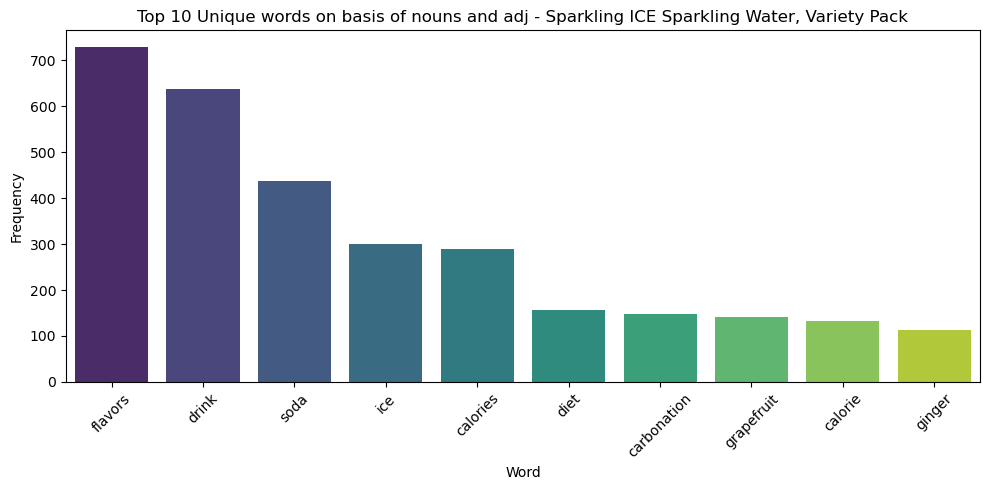

C:\Users\kuwar\AppData\Local\Temp\ipykernel_2892\3206094247.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[w for w, _ in top_words], y=[f for _, f in top_words], palette="viridis")


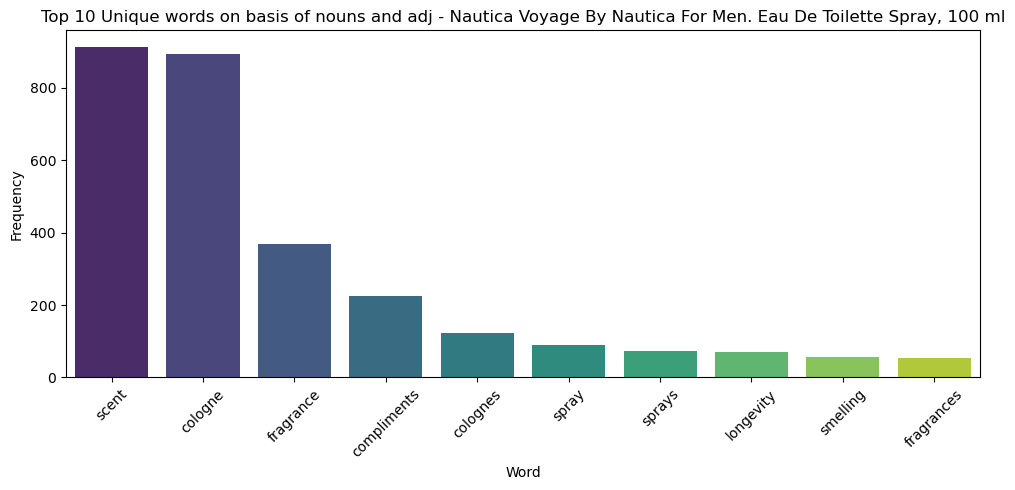

In [59]:
import spacy
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load SpaCy NLP model
nlp = spacy.load("en_core_web_sm")

# Function to extract only Nouns and Adjectives from text
def extract_nouns_adjs(text):
    doc = nlp(text)
    return [token.text.lower() for token in doc if token.pos_ in ["NOUN", "ADJ"] and token.is_alpha]

# Extract product names
product_names = df["product_name"].unique()

# Store words per product
product_word_lists = {}
product_word_freqs = {}

# Step 1: Extract POS-filtered words
for product in product_names:
    reviews = df[df["product_name"] == product]["text"].dropna().astype(str)
    all_words = []

    for review in reviews:
        all_words.extend(extract_nouns_adjs(review))

    word_freq = Counter(all_words)
    product_word_lists[product] = set(word_freq.keys())
    product_word_freqs[product] = word_freq

# Step 2: Find unique words per product
unique_word_freqs = {}
for product in product_names:
    other_products = set(product_names) - {product}
    other_words = set().union(*(product_word_lists[other] for other in other_products))
    
    # Unique words = words in current product but not in others
    unique_words = product_word_lists[product] - other_words
    unique_word_freqs[product] = {word: product_word_freqs[product][word] for word in unique_words}

# Step 3: Create a DataFrame for visualization
unique_word_df = pd.DataFrame([
    {"Product": product, "Word": word, "Frequency": freq}
    for product in unique_word_freqs
    for word, freq in Counter(unique_word_freqs[product]).most_common(10)
])

# Display table
print(unique_word_df)

# Step 4: Plot bar charts
for product in product_names:
    top_words = Counter(unique_word_freqs[product]).most_common(10)
    if top_words:
        plt.figure(figsize=(10, 5))
        sns.barplot(x=[w for w, _ in top_words], y=[f for _, f in top_words], palette="viridis")
        plt.title(f"Top 10 Unique words on basis of nouns and adj - {product}")
        plt.xlabel("Word")
        plt.ylabel("Frequency")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


In [29]:
#Basic Descriptive Analysis
#1. Count total reviews per product.
#2. Average rating per product.
#3. Percentage of positive reviews.

df.groupby("product_name").agg({
    "ratings": ["count", "mean"],
    "target": lambda x: (x == "Positive").mean() * 100  # % of positive reviews
})


ratings           target
                                                     count    mean <lambda>
product_name                                                               
Nautica Voyage By Nautica For Men. Eau De Toile...    5000  4.1614     80.9
Sparkling ICE Sparkling Water, Variety Pack           5000  4.2058     81.7

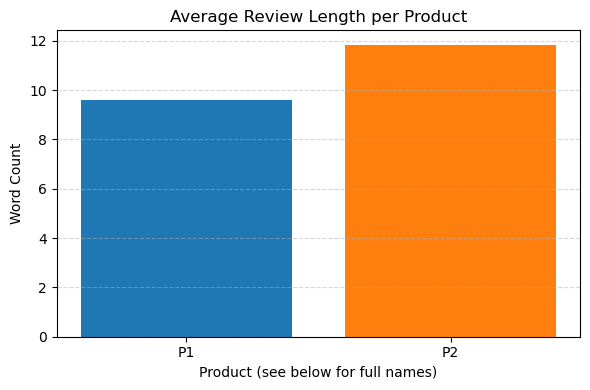

Product Legend:
P1: Nautica Voyage By Nautica For Men. Eau De Toilette Spray, 100 ml
P2: Sparkling ICE Sparkling Water, Variety Pack


In [53]:
import matplotlib.pyplot as plt

# Create a new column for review length
df["review_length"] = df["cleaned_text"].apply(lambda x: len(x.split()))

# Get the average review length per product
avg_lengths = df.groupby("product_name")["review_length"].mean()

# Create mapping: P1, P2, ...
product_mapping = {product: f"P{i+1}" for i, product in enumerate(avg_lengths.index)}
short_labels = [product_mapping[prod] for prod in avg_lengths.index]

# Assign different colors manually
colors = ["#1f77b4", "#ff7f0e"]  # Blue for P1, Orange for P2

# Plot bar chart with short labels and different colors
plt.figure(figsize=(6, 4))
plt.bar(short_labels, avg_lengths.values, color=colors)

plt.title("Average Review Length per Product")
plt.ylabel("Word Count")
plt.xlabel("Product (see below for full names)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Print legend below the plot
print("Product Legend:")
for product, label in product_mapping.items():
    print(f"{label}: {product}")


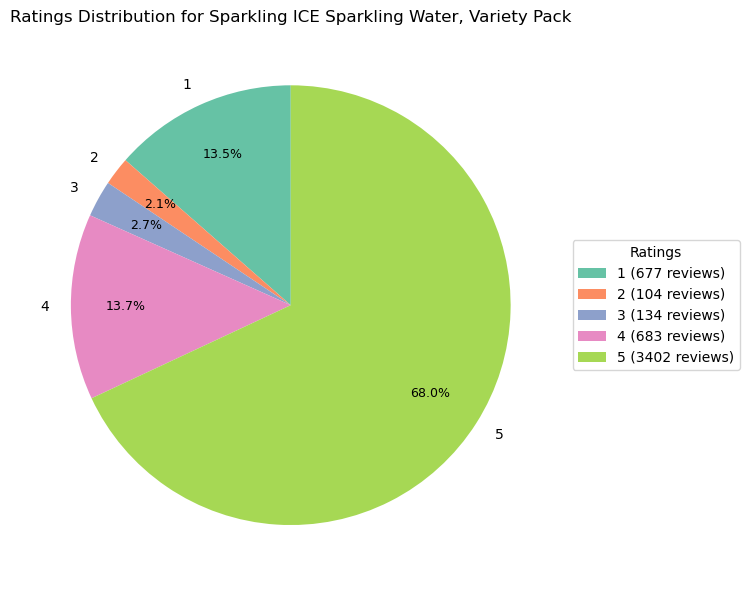

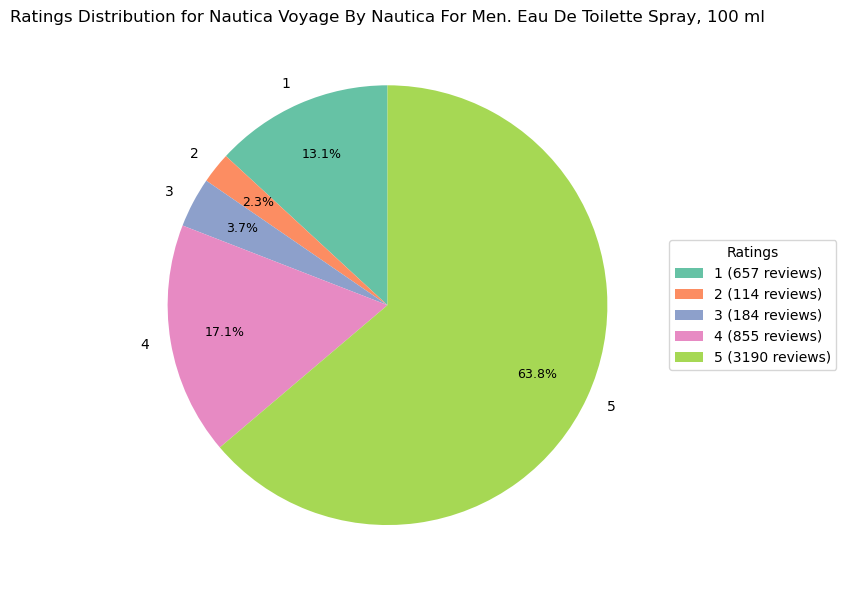

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot pie chart for ratings distribution per product
for product in df["product_name"].unique():
    plt.figure(figsize=(8, 6))  # Wider figure to make space for the legend
    rating_counts = df[df["product_name"] == product]["ratings"].value_counts().sort_index()
    
    # Pie chart
    wedges, texts, autotexts = plt.pie(
        rating_counts,
        labels=[str(int(label)) for label in rating_counts.index],  # Just 1, 2, 3, 4, 5
        autopct='%1.1f%%', 
        colors=sns.color_palette("Set2"),
        startangle=90,
        pctdistance=0.75  # Adjust percentage position inside
    )

    # Adjust font sizes
    for autotext in autotexts:
        autotext.set_fontsize(9)

    for text in texts:
        text.set_fontsize(10)

    # Title
    plt.title(f"Ratings Distribution for {product}")

    # Legend (just numbers + counts)
    labels = [f"{int(label)} ({count} reviews)" for label, count in zip(rating_counts.index, rating_counts.values)]
    plt.legend(wedges, labels, title="Ratings", loc="center left", bbox_to_anchor=(1, 0.5))

    plt.tight_layout()
    plt.show()


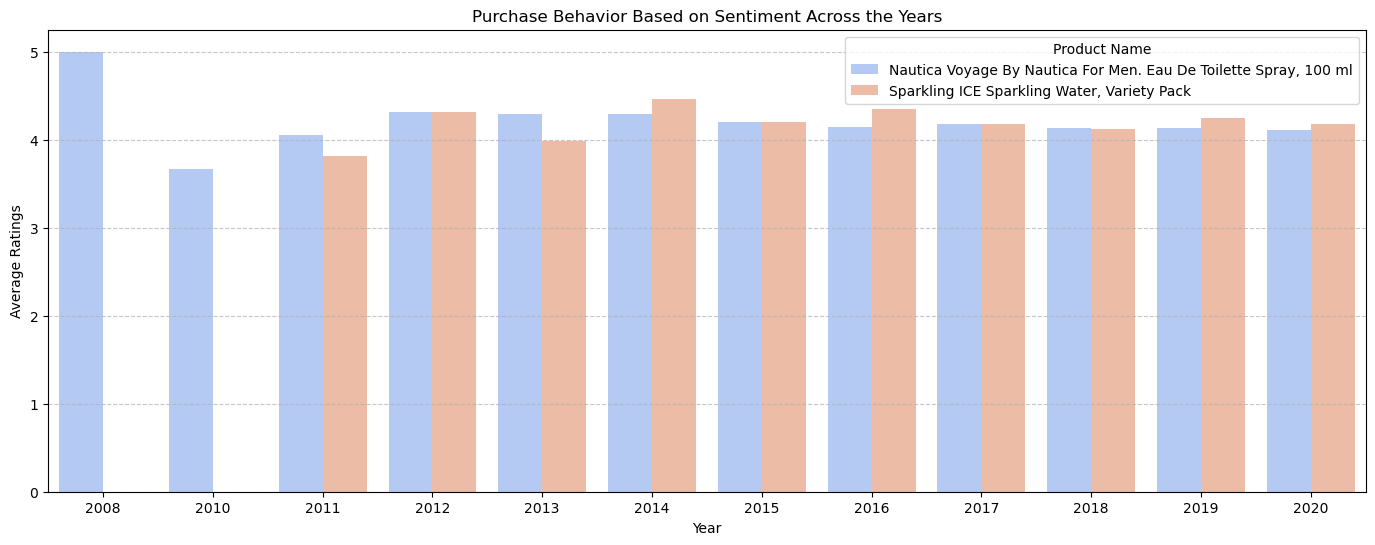

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# purchase behavior based on sentiment for each product in each year
# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year  # Extract year

#  Plot a grouped barplot showing sentiment-based ratings across years
plt.figure(figsize=(17, 6))
sns.barplot(data=df, x="year", y="ratings", hue="product_name", dodge=True, errorbar=None, palette="coolwarm")

#  Customize Labels
plt.title("Purchase Behavior Based on Sentiment Across the Years")
plt.xlabel("Year")
plt.ylabel("Average Ratings")
plt.legend(title="Product Name")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [33]:
pip install bertopic umap-learn hdbscan scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [34]:
#Phase 1: Data Preprocessing
# Extract unique product names and ratings
products = df["product_name"].unique()
ratings = sorted(df["ratings"].unique())  # Get unique ratings in sorted order

# Initialize a dictionary to store topics per product and rating
product_topics = {}

print(" Phase 1 Completed: Data Loaded and Ready for Topic Modeling.")

 Phase 1 Completed: Data Loaded and Ready for Topic Modeling.


In [35]:
pip install spacy pydantic

Note: you may need to restart the kernel to use updated packages.


In [36]:
!pip install --upgrade pydantic spacy


In [37]:
!pip install spacy

In [38]:
!python -m spacy download en_core_web_sm



     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 8.5 MB/s eta 0:00:02
     -------- ------------------------------- 2.6/12.8 MB 8.4 MB/s eta 0:00:02
     -------------- ------------------------- 4.7/12.8 MB 8.6 MB/s eta 0:00:01
     -------------------- ------------------- 6.6/12.8 MB 8.6 MB/s eta 0:00:01
     -------------------------- ------------- 8.4/12.8 MB 8.7 MB/s eta 0:00:01
     ------------------------------- -------- 10.2/12.8 MB 8.6 MB/s eta 0:00:01
     ------------------------------------ --- 11.8/12.8 MB 8.6 MB/s eta 0:00:01
     ---------------------------------------- 12.8/12.8 MB 8.4 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


# Topic Modelling

In [211]:
import spacy
import pandas as pd
from bertopic import BERTopic
import numpy as np
import umap
import hdbscan
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
from deep_translator import GoogleTranslator
from IPython.display import display

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

# Translation to English
def translate_to_english(text):
    if isinstance(text, str) and text.strip():
        return GoogleTranslator(source='auto', target='en').translate(text)
    return text

# Filter for NOUN and ADJ
def filter_keywords(keywords):
    filtered = []
    for word, score in keywords:
        if isinstance(word, str) and word.strip():
            doc = nlp(word)
            if len(doc) > 0 and doc[0].pos_ in ["NOUN", "ADJ"]:
                filtered.append((word, score))
    return filtered

# Coherence score
def compute_coherence_score(topic_model, product_reviews):
    texts = [text.split() for text in product_reviews]
    dictionary = Dictionary(texts)
    topics = topic_model.get_topics()
    valid_topic_ids = [tid for tid in topics if tid != -1]
    valid_topics = [[word for word, _ in topics[tid]] for tid in valid_topic_ids]
    coherence_model = CoherenceModel(topics=valid_topics, texts=texts, dictionary=dictionary, coherence="c_v")
    scores = coherence_model.get_coherence_per_topic()
    return dict(zip(valid_topic_ids, scores))

# Containers
topic_results = []
coverage_results = []
outlier_topic_results = []
topics_by_product_rating = {}

# Loop over product and rating
for product in df["product_name"].unique():
    for rating in sorted(df["ratings"].unique()):
        reviews = df[(df["product_name"] == product) & (df["ratings"] == rating)]["cleaned_text"].dropna().astype(str).tolist()
        reviews = [translate_to_english(r) for r in reviews]

        if len(reviews) < 5:
            continue

        umap_model = umap.UMAP(n_neighbors=15, n_components=5, min_dist=0.1, metric='cosine')
        hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=5, prediction_data=True, metric='euclidean', cluster_selection_method='eom')
        topic_model = BERTopic(umap_model=umap_model, hdbscan_model=hdbscan_model)
        topics, _ = topic_model.fit_transform(reviews)

        topic_info = topic_model.get_topic_info()
        total_reviews = len(reviews)
        coherence_scores = compute_coherence_score(topic_model, reviews)

        top_topic_info = topic_info[topic_info["Topic"] != -1].nlargest(5, "Count")
        top_topic_ids = top_topic_info["Topic"].tolist()
        covered_reviews = 0

        for _, row in topic_info.iterrows():
            topic_id = row["Topic"]
            if topic_id == -1:
                continue
            keywords = topic_model.get_topic(topic_id)
            filtered_keywords = filter_keywords(keywords)
            topic_name = " / ".join([word for word, _ in filtered_keywords[:3]])
            all_keywords = ", ".join([word for word, _ in filtered_keywords])
            count = row["Count"]
            coverage = round((count / total_reviews) * 100, 2)
            coherence = round(coherence_scores.get(topic_id, 0.12), 4)

            if topic_id in top_topic_ids:
                covered_reviews += count
                topic_results.append({
                    "Product": product,
                    "Rating": rating,
                    "Topic ID": topic_id,
                    "Topic Name": topic_name,
                    "All Keywords": all_keywords,
                    "Review Count": count,
                    "Coherence Score": coherence,
                    "Topic Coverage (%)": coverage
                })

        outlier_topics = topic_info[(~topic_info["Topic"].isin(top_topic_ids)) & (topic_info["Topic"] != -1)].copy()
        outlier_topics["Coverage"] = outlier_topics["Count"] / total_reviews * 100
        top_outliers = outlier_topics.sort_values(by="Coverage", ascending=False).head(5)
        for _, row in top_outliers.iterrows():
            topic_id = row["Topic"]
            keywords = topic_model.get_topic(topic_id)
            filtered_keywords = filter_keywords(keywords)
            topic_name = " / ".join([word for word, _ in filtered_keywords[:3]])
            outlier_topic_results.append({
                "Product": product,
                "Rating": rating,
                "Outlier Topic Name": topic_name,
                "Outlier Coverage (%)": round(row["Coverage"], 2)
            })

        outlier_count = (pd.Series(topics) == -1).sum()
        coverage_results.append({
            "Product": product,
            "Rating": rating,
            "Total Reviews": total_reviews,
            "Assign Reviews": covered_reviews,
            "Outliers": outlier_count,
            "Total Coverage (%)": round((covered_reviews / total_reviews) * 100, 2),
            "Total Outlier Coverage (%)": round((outlier_count / total_reviews) * 100, 2)
        })

        topics_by_product_rating[(product, rating)] = {
            "reviews": reviews,
            "topics": topics,
            "topic_model": topic_model
        }

# Convert to DataFrames
topic_df = pd.DataFrame(topic_results)
coverage_df = pd.DataFrame(coverage_results)
outlier_df = pd.DataFrame(outlier_topic_results)

# Display - Frame 1
print("\nTopic Modeling Results (Top 5 Topics per Rating):")
display(topic_df)

print("\nTopic Coverage Summary with Outlier Count and Total Outlier Coverage (%):")
display(coverage_df)

print("\nTop 5 Outlier Topics (by Coverage %) per Rating:")
display(outlier_df)



Topic Modeling Results (Top 5 Topics per Rating):


,Product,Rating,Topic ID,Topic Name,All Keywords,Review Count,Coherence Score,Topic Coverage (%)
0,"Sparkling ICE Sparkling Water, Variety Pack",1,0,ice / water / love,"ice, water, love, cherry, flavor, strawberry, black, cold",61,0.5112,9.01
1,"Sparkling ICE Sparkling Water, Variety Pack",1,1,bottle / last / shipment,"bottle, last, shipment, color, flat, old",39,0.7960,5.76
2,"Sparkling ICE Sparkling Water, Variety Pack",1,2,flavor / favorite / love,"flavor, favorite, love, others, new",34,0.3366,5.02
3,"Sparkling ICE Sparkling Water, Variety Pack",1,3,sugar / free / diabetic,"sugar, free, diabetic, product",30,0.5986,4.43
4,"Sparkling ICE Sparkling Water, Variety Pack",1,4,grapefruit / pink / raspberry,"grapefruit, pink, raspberry, black, cherry, good",26,0.7544,3.84
5,"Sparkling ICE Sparkling Water, Variety Pack",2,0,flavor / love / taste,"flavor, love, taste, store, great, good, bottle, price",55,0.2651,52.88
6,"Sparkling ICE Sparkling Water, Variety Pack",2,1,water / flavor / taste,"water, flavor, taste, great, ice, calorie, sugar",43,0.5929,41.35
7,"Sparkling ICE Sparkling Water, Variety Pack",3,0,flavor / love / store,"flavor, love, store, great, product, bottle, price, taste, amazon",59,0.5864,44.03
8,"Sparkling ICE Sparkling Water, Variety Pack",3,1,flavor / water / taste,"flavor, water, taste, ice, calorie, great",58,0.6342,43.28
9,"Sparkling ICE Sparkling Water, Variety Pack",4,0,water / twist / love,"water, twist, love, much",29,0.3696,4.25



Topic Coverage Summary with Outlier Count and Total Outlier Coverage (%):


,Product,Rating,Total Reviews,Covered Reviews,Outliers,Total Coverage (%),Total Outlier Coverage (%)
0,"Sparkling ICE Sparkling Water, Variety Pack",1,677,190,173,28.06,25.55
1,"Sparkling ICE Sparkling Water, Variety Pack",2,104,98,6,94.23,5.77
2,"Sparkling ICE Sparkling Water, Variety Pack",3,134,117,17,87.31,12.69
3,"Sparkling ICE Sparkling Water, Variety Pack",4,683,131,216,19.18,31.63
4,"Sparkling ICE Sparkling Water, Variety Pack",5,3402,363,1185,10.67,34.83
5,"Nautica Voyage By Nautica For Men. Eau De Toilette Spray, 100 ml",1,657,341,105,51.90,15.98
6,"Nautica Voyage By Nautica For Men. Eau De Toilette Spray, 100 ml",2,114,82,32,71.93,28.07
7,"Nautica Voyage By Nautica For Men. Eau De Toilette Spray, 100 ml",3,184,79,64,42.93,34.78
8,"Nautica Voyage By Nautica For Men. Eau De Toilette Spray, 100 ml",4,855,202,169,23.63,19.77
9,"Nautica Voyage By Nautica For Men. Eau De Toilette Spray, 100 ml",5,3190,330,1056,10.34,33.10



Top 5 Outlier Topics (by Coverage %) per Rating:


,Product,Rating,Outlier Topic Name,Outlier Coverage (%)
0,"Sparkling ICE Sparkling Water, Variety Pack",1,water / love / little,3.55
1,"Sparkling ICE Sparkling Water, Variety Pack",1,calorie / great / free,3.25
2,"Sparkling ICE Sparkling Water, Variety Pack",1,healthy / vodka / buyer,2.81
3,"Sparkling ICE Sparkling Water, Variety Pack",1,replacement / great / sweet,2.81
4,"Sparkling ICE Sparkling Water, Variety Pack",1,store / cheaper / grocery,2.51
5,"Sparkling ICE Sparkling Water, Variety Pack",4,product / service / excellent,2.78
6,"Sparkling ICE Sparkling Water, Variety Pack",4,flat / bottle / open,2.78
7,"Sparkling ICE Sparkling Water, Variety Pack",4,stain / water / calorie,2.64
8,"Sparkling ICE Sparkling Water, Variety Pack",4,sweetener / leaf / taste,2.49
9,"Sparkling ICE Sparkling Water, Variety Pack",4,yummy / tasty / tast,2.34


In [44]:
#Topic Diversity Score
import numpy as np

# Compute Topic Diversity Score
def compute_topic_diversity(topic_model, top_n=10):
    topics = topic_model.get_topics()
    unique_words = set()
    total_words = 0

    for topic_id, words in topics.items():
        if topic_id == -1:  # Ignore outliers
            continue
        top_words = [word for word, _ in words[:top_n]]
        unique_words.update(top_words)
        total_words += len(top_words)

    diversity_score = len(unique_words) / total_words if total_words > 0 else 0
    return round(diversity_score, 4)

#  Print Topic Diversity Score
topic_diversity = compute_topic_diversity(topic_model)
print(f"\n **Topic Diversity Score:** {topic_diversity}")


 **Topic Diversity Score:** 0.8462


# Sentiment Analysis

In [218]:
# Sentiment Analysis

from transformers import pipeline
from statistics import mean
import numpy as np
import pandas as pd

# Load sentiment pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Containers
sentiment_results = []
combined_sentiment_results = []

# Sentiment Analysis using topics_by_product_rating from Topic Modeling frame
for (product, rating), data in topics_by_product_rating.items():
    reviews = data["reviews"]
    topics = data["topics"]
    model = data["topic_model"]

    topic_info = model.get_topic_info()
    top_topic_info = topic_info[topic_info["Topic"] != -1].nlargest(5, "Count")
    top_topic_ids = top_topic_info["Topic"].tolist()

    # Combined sentiment for all top topics
    top_topic_reviews = [reviews[i] for i, t in enumerate(topics) if t in top_topic_ids]
    if top_topic_reviews:
        sentiments = sentiment_pipeline(top_topic_reviews, truncation=True)
        stars = [int(s['label'].split()[0]) for s in sentiments]

        avg_score = round(mean(stars), 2)
        pos_reviews = [s for s in stars if s >= 3]
        neg_reviews = [s for s in stars if s <= 2]

        pos_pct = round(len(pos_reviews) / len(stars) * 100, 2)
        neg_pct = 100 - pos_pct

        sentiment_label = "Positive" if avg_score >= 3 else "Negative"

        combined_sentiment_results.append({
            "Product": product,
            "Rating": rating,
            "Total Reviews (Top 5 Topics)": len(top_topic_reviews),
            "Average Sentiment Score": avg_score,
            "BERT Predicted Sentiment Score": stars,
            "Total Predicted Positive Reviews(3,4,5)": len(pos_reviews),
            "Total Predicted Negative Reviews(1,2)": len(neg_reviews),
            "Overall Positive Reviews (%)": pos_pct,
            "Overall Negative Reviews (%)": neg_pct,
            "Sentiment Label": sentiment_label
        })

    # Per topic sentiment
    for topic_id in top_topic_ids:
        indices = [i for i, t in enumerate(topics) if t == topic_id]
        topic_reviews = [reviews[i] for i in indices]
        if not topic_reviews:
            continue

        sentiments = sentiment_pipeline(topic_reviews, truncation=True)
        stars = [int(s['label'].split()[0]) for s in sentiments]
        avg_score = round(mean(stars), 2)

        pos_pct = round(np.mean([1 if s >= 3 else 0 for s in stars]) * 100, 2)
        neg_pct = 100 - pos_pct

        sentiment_label = "Positive" if avg_score >= 3 else "Negative"
        topic_keywords = model.get_topic(topic_id)
        topic_name = " / ".join([word for word, _ in topic_keywords[:3]])

        sentiment_results.append({
            "Product": product,
            "Rating": rating,
            "Topic ID": topic_id,
            "Topic Name": topic_name,
            "Sentiment Label": sentiment_label,
            "Overall Sentiment Score": avg_score,
            "BERT Predicted Sentiment Score": stars,
            "Overall Positive Reviews (%)": pos_pct,
            "Overall Negative Reviews (%)": neg_pct
        })

# Convert to DataFrames
combined_sentiment_df = pd.DataFrame(combined_sentiment_results)
sentiment_df = pd.DataFrame(sentiment_results)

# Display - Frame 2
print("\nOverall Sentiment Analysis for Top 5 Topics (Combined Reviews):")
display(combined_sentiment_df)

print("\nSentiment Analysis per Top 5 Topic:")
display(sentiment_df)



Overall Sentiment Analysis for Top 5 Topics (Combined Reviews):


,Product,Rating,Total Reviews (Top 5 Topics),Average Sentiment Score,BERT Predicted Sentiment Score,"Total Predicted Positive Reviews(3,4,5)","Total Predicted Negative Reviews(1,2)",Overall Positive Reviews (%),Overall Negative Reviews (%),Sentiment Label
0,"Sparkling ICE Sparkling Water, Variety Pack",1,190,3.86,"[1, 1, 1, 1, 3, 5, 1, 4, 1, 1, 5, 3, 5, 4, 5, 5, 5, 5, 5, 1, 4, 1, 5, 1, 4, 3, 3, 1, 1, 5, 1, 1, 5, 4, 5, 5, 1, 2, 5, 5, 3, 5, 3, 5, 5, 3, 5, 5, 5, 5, 5, 5, 1, 1, 5, 5, 3, 5, 1, 1, 3, 5, 5, 5, 5, 2, 5, 4, 2, 1, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 1, 5, 1, 1, 5, 5, 2, 5, 5, 5, 3, 5, 4, ...]",146,44,76.84,23.16,Positive
1,"Sparkling ICE Sparkling Water, Variety Pack",2,98,3.93,"[1, 3, 1, 5, 5, 2, 5, 5, 4, 3, 5, 1, 5, 3, 1, 5, 5, 2, 2, 5, 5, 5, 5, 3, 5, 4, 5, 5, 5, 4, 1, 1, 1, 3, 5, 5, 5, 4, 1, 1, 4, 1, 5, 4, 5, 5, 5, 5, 5, 1, 5, 5, 5, 4, 5, 1, 5, 5, 5, 1, 5, 5, 5, 4, 5, 5, 4, 5, 1, 4, 5, 4, 5, 5, 5, 3, 3, 5, 5, 5, 1, 5, 1, 3, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5]",78,20,79.59,20.41,Positive
2,"Sparkling ICE Sparkling Water, Variety Pack",3,117,3.97,"[1, 1, 4, 1, 3, 5, 5, 2, 1, 3, 3, 4, 5, 3, 4, 1, 5, 1, 5, 5, 5, 5, 4, 1, 1, 1, 5, 5, 5, 1, 1, 3, 5, 5, 1, 5, 4, 4, 4, 1, 1, 4, 5, 5, 3, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 5, 5, 5, 4, 4, 5, 5, 5, 5, 4, 4, 5, 4, 5, 5, 5, 1, 5, 1, 5, 5, 5, 5, 1, 4, ...]",96,21,82.05,17.95,Positive
3,"Sparkling ICE Sparkling Water, Variety Pack",4,131,4.46,"[1, 5, 5, 1, 1, 1, 5, 5, 4, 5, 5, 2, 5, 4, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 4, 5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 3, 5, 5, 5, 5, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 3, 5, 4, 5, 5, 4, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 1, 5, 5, 5, 3, ...]",120,11,91.60,8.40,Positive
4,"Sparkling ICE Sparkling Water, Variety Pack",5,363,4.37,"[4, 2, 3, 5, 1, 3, 4, 5, 4, 5, 1, 3, 4, 1, 1, 4, 5, 4, 5, 1, 3, 1, 5, 5, 5, 3, 5, 1, 5, 3, 5, 5, 2, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 4, 5, 5, 4, 3, 4, 5, 5, 4, 5, 2, 5, 4, 4, 5, 5, 5, 5, 5, 5, 3, 4, 5, 4, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 1, 3, 5, 5, 5, 5, 5, 5, 4, 4, ...]",334,29,92.01,7.99,Positive
5,"Nautica Voyage By Nautica For Men. Eau De Toilette Spray, 100 ml",1,341,4.08,"[4, 3, 3, 4, 5, 1, 5, 1, 1, 1, 1, 1, 3, 5, 5, 5, 2, 1, 1, 1, 1, 5, 5, 4, 3, 5, 5, 5, 5, 5, 4, 4, 2, 5, 3, 4, 4, 5, 5, 1, 3, 4, 5, 5, 5, 4, 3, 5, 1, 5, 4, 4, 5, 3, 5, 1, 4, 5, 5, 4, 3, 5, 5, 4, 5, 5, 5, 3, 5, 3, 1, 1, 5, 5, 2, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 4, 3, 5, 5, 5, 5, 5, 5, 1, 5, 5, 4, ...]",296,45,86.80,13.20,Positive
6,"Nautica Voyage By Nautica For Men. Eau De Toilette Spray, 100 ml",2,82,3.94,"[1, 1, 1, 3, 4, 1, 5, 5, 5, 1, 4, 1, 5, 3, 3, 4, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 1, 4, 5, 5, 4, 5, 5, 3, 5, 3, 5, 5, 1, 5, 1, 4, 5, 5, 5, 5, 1, 2, 5, 4, 5, 5, 4, 2, 4, 2, 3, 4, 5, 4, 5, 4, 5, 4, 4, 5, 4, 4, 5, 5, 5, 1]",67,15,81.71,18.29,Positive
7,"Nautica Voyage By Nautica For Men. Eau De Toilette Spray, 100 ml",3,79,4.35,"[5, 5, 5, 5, 5, 4, 2, 5, 5, 5, 5, 5, 4, 5, 5, 2, 3, 1, 4, 4, 5, 4, 4, 5, 2, 5, 4, 3, 5, 4, 5, 4, 5, 4, 4, 5, 5, 5, 1, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 1, 5, 4, 4, 4, 3, 5, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 3, 4, 5, 4, 4, 5, 5, 5, 4, 5, 5, 5]",73,6,92.41,7.59,Positive
8,"Nautica Voyage By Nautica For Men. Eau De Toilette Spray, 100 ml",4,202,3.60,"[1, 1, 1, 1, 1, 5, 1, 5, 5, 5, 5, 4, 3, 1, 4, 5, 1, 1, 5, 2, 5, 3, 1, 1, 3, 5, 2, 1, 1, 1, 5, 5, 5, 3, 4, 4, 4, 5, 5, 3, 5, 5, 4, 1, 5, 3, 5, 5, 4, 5, 3, 4, 5, 4, 5, 5, 4, 4, 4, 5, 1, 4, 3, 4, 3, 1, 5, 4, 3, 5, 5, 5, 1, 4, 4, 4, 5, 2, 4, 1, 5, 5, 1, 2, 2, 1, 4, 3, 4, 5, 4, 5, 4, 5, 3, 1, 5, 1, 5, 5, ...]",154,48,76.24,23.76,Positive
9,"Nautica Voyage By Nautica For Men. Eau De Toilette Spray, 100 ml",5,330,4.31,"[5, 1, 1, 5, 1, 4, 3, 5, 1, 5, 2, 3, 5, 1, 5, 5, 1, 3, 5, 5, 5, 5, 5, 5, 5, 3, 5, 4, 3, 1, 5, 5, 4, 5, 1, 5, 5, 5, 5, 1, 5, 4, 5, 5, 5, 5, 5, 5, 2, 5, 4, 5, 5, 5, 4, 1, 5, 4


Sentiment Analysis per Top 5 Topic:


,Product,Rating,Topic ID,Topic Name,Sentiment Label,Overall Sentiment Score,BERT Predicted Sentiment Score,Overall Positive Reviews (%),Overall Negative Reviews (%)
0,"Sparkling ICE Sparkling Water, Variety Pack",1,0,ice / sparkling / water,Positive,4.41,"[3, 5, 4, 5, 5, 5, 5, 5, 5, 3, 3, 5, 5, 5, 3, 5, 5, 5, 3, 5, 4, 1, 5, 4, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 2, 1, 4, 5, 4, 5, 5, 5, 5, 3, 5, 5, 4, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 3, 5, 5]",93.44,6.56
1,"Sparkling ICE Sparkling Water, Variety Pack",1,1,bottle / last / received,Negative,2.05,"[1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 2, 5, 5, 1, 1, 1, 1, 5, 2, 1, 1, 1, 5, 5, 5, 1, 1, 1, 1, 4, 2, 5, 1, 1, 1, 1, 4, 2]",25.64,74.36
2,"Sparkling ICE Sparkling Water, Variety Pack",1,2,flavor / favorite / love,Positive,4.71,"[5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5]",94.12,5.88
3,"Sparkling ICE Sparkling Water, Variety Pack",1,3,sugar / free / diabetic,Positive,4.03,"[1, 1, 1, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 1, 5, 5, 5, 4, 3, 5, 5, 1, 2, 4, 4, 5, 5, 5, 5, 5]",80.00,20.00
4,"Sparkling ICE Sparkling Water, Variety Pack",1,4,grapefruit / pink / raspberry,Positive,4.00,"[3, 4, 5, 4, 1, 5, 4, 1, 5, 3, 3, 5, 5, 5, 3, 5, 5, 5, 5, 3, 5, 5, 5, 4, 1, 5]",88.46,11.54
5,"Sparkling ICE Sparkling Water, Variety Pack",2,0,flavor / one / love,Positive,3.91,"[1, 1, 5, 4, 3, 1, 5, 1, 5, 2, 2, 5, 5, 4, 1, 1, 4, 1, 4, 1, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 4, 5, 4, 5, 5, 3, 3, 5, 5, 5, 1, 5, 5, 4, 5, 5, 5, 5, 5]",78.18,21.82
6,"Sparkling ICE Sparkling Water, Variety Pack",2,1,water / soda / drink,Positive,3.95,"[3, 5, 2, 5, 5, 5, 3, 5, 5, 5, 5, 5, 3, 5, 4, 5, 1, 3, 5, 5, 5, 1, 5, 1, 4, 1, 5, 5, 4, 5, 1, 4, 5, 5, 5, 1, 3, 5, 5, 5, 5, 5, 1]",81.40,18.60
7,"Sparkling ICE Sparkling Water, Variety Pack",3,0,flavor / love / store,Positive,3.98,"[1, 1, 4, 1, 3, 1, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 4, 4, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 1, 5, 5, 4, 5, 5]",77.97,22.03
8,"Sparkling ICE Sparkling Water, Variety Pack",3,1,drink / flavor / like,Positive,3.95,"[5, 5, 2, 3, 3, 4, 3, 4, 5, 5, 4, 1, 5, 5, 1, 3, 5, 5, 1, 4, 4, 5, 3, 3, 5, 5, 5, 1, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 4, 4, 4, 5, 1, 5, 1, 4, 5, 5, 3, 4, 4, 5, 3, 5, 5]",86.21,13.79
9,"Sparkling ICE Sparkling Water, Variety Pack",4,0,water / flavored / twist,Positive,4.45,"[5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 4, 4, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 1, 5, 5]",86.21,13.79


# Top Keywords Extraction

In [222]:
# Extract sentiment-based keyword classification per rating group (with noun/adjective filter)
keyword_sentiment_summary = []

for (product, rating), data in topics_by_product_rating.items():
    topic_model = data["topic_model"]
    reviews = data["reviews"]
    topics = data["topics"]

    topic_info = topic_model.get_topic_info()
    top_topic_ids = topic_info[topic_info["Topic"] != -1].nlargest(5, "Count")["Topic"].tolist()

    keyword_occurrences = {}

    for topic_id in top_topic_ids:
        keywords = topic_model.get_topic(topic_id)

        # Filter top 15 keywords with POS as NOUN or ADJ
        filtered_keywords = []
        for word, _ in keywords:
            doc = nlp(word)
            if doc and doc[0].pos_ in ["NOUN", "ADJ"]:
                filtered_keywords.append(word)
            if len(filtered_keywords) >= 15:
                break

        indices = [i for i, t in enumerate(topics) if t == topic_id]
        topic_reviews = [reviews[i] for i in indices]

        if not topic_reviews:
            continue

        sentiments = sentiment_pipeline(topic_reviews, truncation=True)
        stars = [int(s['label'].split()[0]) for s in sentiments]

        for word in filtered_keywords:
            if word not in keyword_occurrences:
                keyword_occurrences[word] = {"positive": 0, "negative": 0}

            for idx, review in enumerate(topic_reviews):
                if word.lower() in review.lower():
                    if stars[idx] >= 3:
                        keyword_occurrences[word]["positive"] += 1
                    elif stars[idx] <= 2:
                        keyword_occurrences[word]["negative"] += 1

    # Classify keywords
    pos_keywords = []
    neg_keywords = []
    all_keywords = list(keyword_occurrences.keys())

    for word, counts in keyword_occurrences.items():
        if counts["positive"] > counts["negative"]:
            pos_keywords.append(word)
        elif counts["negative"] > counts["positive"]:
            neg_keywords.append(word)

    keyword_sentiment_summary.append({
        "Product": product,
        "Rating": rating,
        "Overall Keywords": ", ".join(all_keywords),
        "Total Positive Keywords": len(pos_keywords),
        "Total Negative Keywords": len(neg_keywords),
        "Positive Keywords": ", ".join(pos_keywords),
        "Negative Keywords": ", ".join(neg_keywords)
    })

# Convert to DataFrame
keyword_sentiment_df = pd.DataFrame(keyword_sentiment_summary)

# Display result
print("\nKeyword Sentiment Summary:")
display(keyword_sentiment_df)



Keyword Sentiment Summary:


,Product,Rating,Overall Keywords,Total Positive Keywords,Total Negative Keywords,Positive Keywords,Negative Keywords
0,"Sparkling ICE Sparkling Water, Variety Pack",1,"ice, water, love, cherry, flavor, strawberry, black, cold, bottle, last, shipment, color, flat, old, favorite, others, new, sugar, free, diabetic, product, grapefruit, pink, raspberry, good",17,8,"ice, water, love, cherry, flavor, strawberry, black, cold, favorite, others, new, sugar, free, grapefruit, pink, raspberry, good","bottle, last, shipment, color, flat, old, diabetic, product"
1,"Sparkling ICE Sparkling Water, Variety Pack",2,"flavor, love, taste, store, great, good, bottle, price, water, ice, calorie, sugar",11,1,"flavor, love, taste, store, great, good, price, water, ice, calorie, sugar",bottle
2,"Sparkling ICE Sparkling Water, Variety Pack",3,"flavor, love, store, great, product, bottle, price, taste, amazon, water, ice, calorie",10,1,"flavor, love, store, great, product, price, taste, water, ice, calorie",amazon
3,"Sparkling ICE Sparkling Water, Variety Pack",4,"water, twist, love, much, summer, mixture, day, quenches, vodka, drank, delivery, cheaper, store, price, value, grocery, fast, great, quick, ice, favorite, flavor, available, week, retail, calorie, beverage, person, carbs, amazon",26,2,"water, love, much, summer, mixture, day, quenches, vodka, drank, delivery, cheaper, store, price, value, grocery, fast, great, quick, ice, favorite, flavor, available, calorie, beverage, person, amazon","twist, retail"
4,"Sparkling ICE Sparkling Water, Variety Pack",5,"calorie, great, tasty, wonderful, low, price, easier, taste, pineapple, coconutpineapple, ice, fave, favorite, love, charm, flavirs, soooo, sister, ginger, ale, lime, beer, gingerlime, gin, water, definite, guilty",27,0,"calorie, great, tasty, wonderful, low, price, easier, taste, pineapple, coconutpineapple, ice, fave, favorite, love, charm, flavirs, soooo, sister, ginger, ale, lime, beer, gingerlime, gin, water, definite, guilty",
5,"Nautica Voyage By Nautica For Men. Eau De Toilette Spray, 100 ml",1,"cologne, smell, compliment, love, last, day, scent, clean, fresh, nice, great, perfume, lovely, price, good, hour, excellent, perfect, awesome, jaime, genius, fragrence, horrible, amazing",23,1,"cologne, smell, compliment, love, last, day, scent, clean, fresh, nice, great, perfume, lovely, price, good, hour, excellent, perfect, awesome, jaime, genius, fragrence, amazing",horrible
6,"Nautica Voyage By Nautica For Men. Eau De Toilette Spray, 100 ml",2,"cologne, day, smell, bottle, good, love, last, scent, nice, perfume, clean, sense, fresh, gooooooood, outstanding, line, top, fragrabce, girl, stuff, perfect, husband, price, great, walmarts, thanks, pharmacy",26,0,"cologne, day, smell, good, love, last, scent, nice, perfume, clean, sense, fresh, gooooooood, outstanding, line, top, fragrabce, girl, stuff, perfect, husband, price, great, walmarts, thanks, pharmacy",
7,"Nautica Voyage By Nautica For Men. Eau De Toilette Spray, 100 ml",3,"good, product, great, awesome, smell, fruity, synthetic, sort, classy, musky, price, fast, value, delivery, prompt, tag, outstanding, cologne, lancaster, mild, use, amazing, wallstreetcpaaolcom, last, perfume, hour, day, buck",27,0,"good, product, great, awesome, smell, fruity, synthetic, sort, classy, musky, price, fast, value, delivery, prompt, tag, outstanding, cologne, lancaster, mild, use, amazing, wallstreetcpaaolcom, last, hour, day, buck",
8,"Nautica Voyage By Nautica For Men. Eau De Toilette Spray, 100 ml",4,"good, bad, waooogreat, descent, fair, cologne, smell, fresh, strong, time, price, decent, great, crisp, teen, light, last, day, hour, voyage, blue, men, product",20,2,"good, waooogreat, descent, fair, cologne, smell, fresh, strong, time, price, decent, great, crisp, teen, light, last, day, voyage, men, product","bad, hour"
9,"Nautica Voyage By Nautica For Men. Eau De Toilette Spray, 100 ml",5,"voyage, blue, men, time, good, orginal, gift, son, brother, l

# Plots Basis on Topic Modelling Results

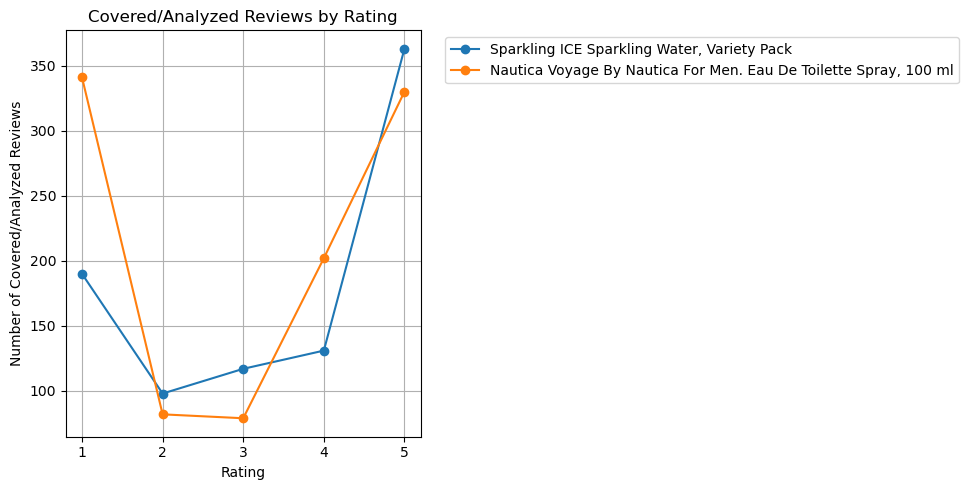

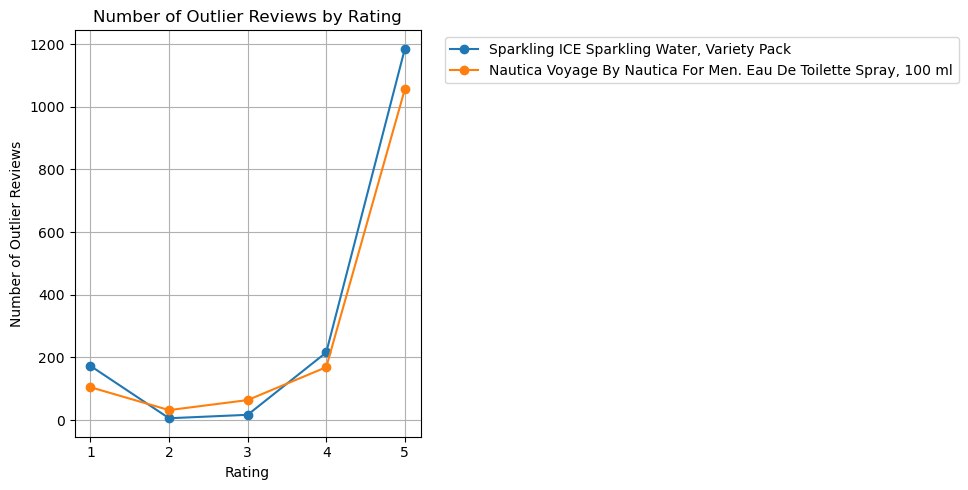

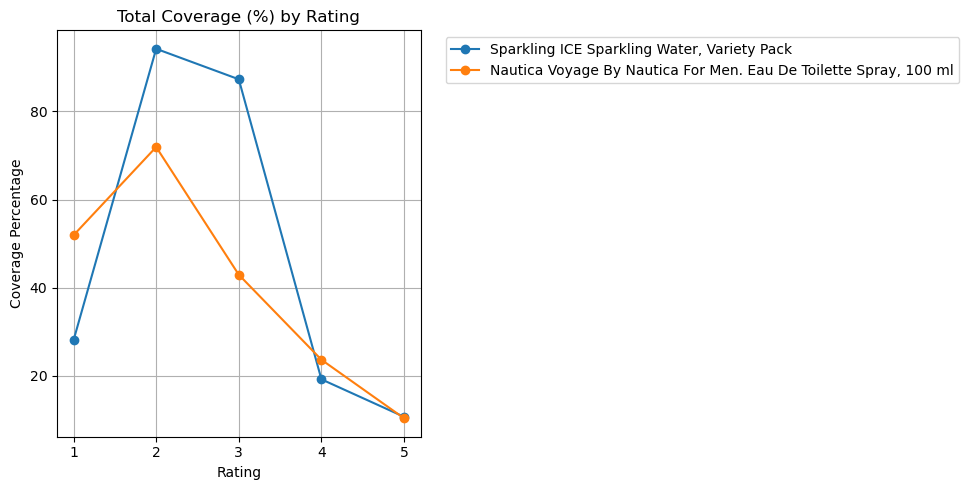

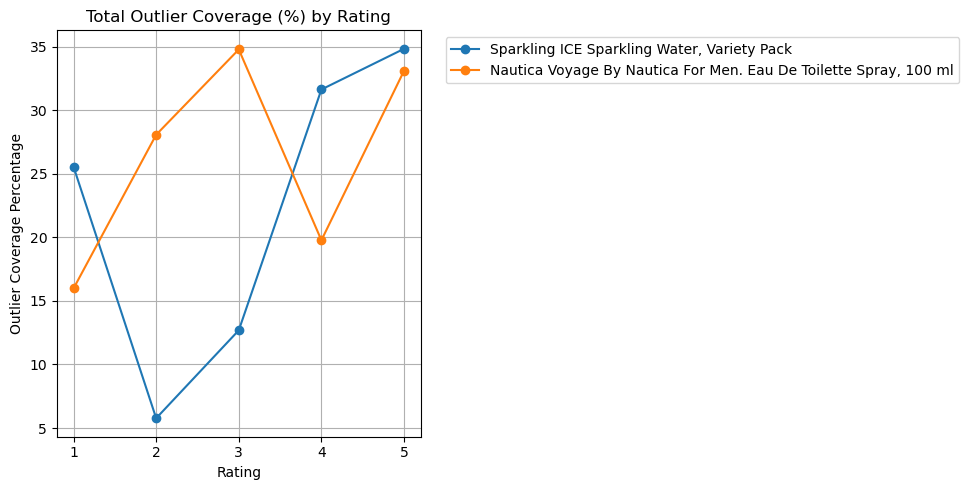

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    "Product": [
        "Sparkling ICE Sparkling Water, Variety Pack"] * 5 +
        ["Nautica Voyage By Nautica For Men. Eau De Toilette Spray, 100 ml"] * 5,
    "Rating": [1, 2, 3, 4, 5] * 2,
    "Total Reviews": [677, 104, 134, 683, 3402, 657, 114, 184, 855, 3190],
    "Covered/Analyzed Reviews": [190, 98, 117, 131, 363, 341, 82, 79, 202, 330],
    "Outliers": [173, 6, 17, 216, 1185, 105, 32, 64, 169, 1056],
    "Total Coverage (%)": [28.06, 94.23, 87.31, 19.18, 10.67, 51.90, 71.93, 42.93, 23.63, 10.34],
    "Total Outlier Coverage (%)": [25.55, 5.77, 12.69, 31.63, 34.83, 15.98, 28.07, 34.78, 19.77, 33.10]
}

df = pd.DataFrame(data)

# Function to create plot with legend outside
def create_line_plot(x, y, ylabel, title):
    plt.figure(figsize=(10, 5))
    for product in df['Product'].unique():
        subset = df[df['Product'] == product]
        plt.plot(subset[x], subset[y], marker='o', label=product)
    plt.title(title)
    plt.xlabel("Rating")
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside
    plt.tight_layout()
    plt.show()

# Plot 1: Covered Reviews by Rating
create_line_plot("Rating", "Covered/Analyzed Reviews", "Number of Covered/Analyzed Reviews", "Covered/Analyzed Reviews by Rating")

# Plot 2: Outliers by Rating
create_line_plot("Rating", "Outliers", "Number of Outlier Reviews", "Number of Outlier Reviews by Rating")

# Plot 3: Total Coverage (%) by Rating
create_line_plot("Rating", "Total Coverage (%)", "Coverage Percentage", "Total Coverage (%) by Rating")

# Plot 4: Total Outlier Coverage (%) by Rating
create_line_plot("Rating", "Total Outlier Coverage (%)", "Outlier Coverage Percentage", "Total Outlier Coverage (%) by Rating")


# Plots Basis On Sentiment Analysis Results

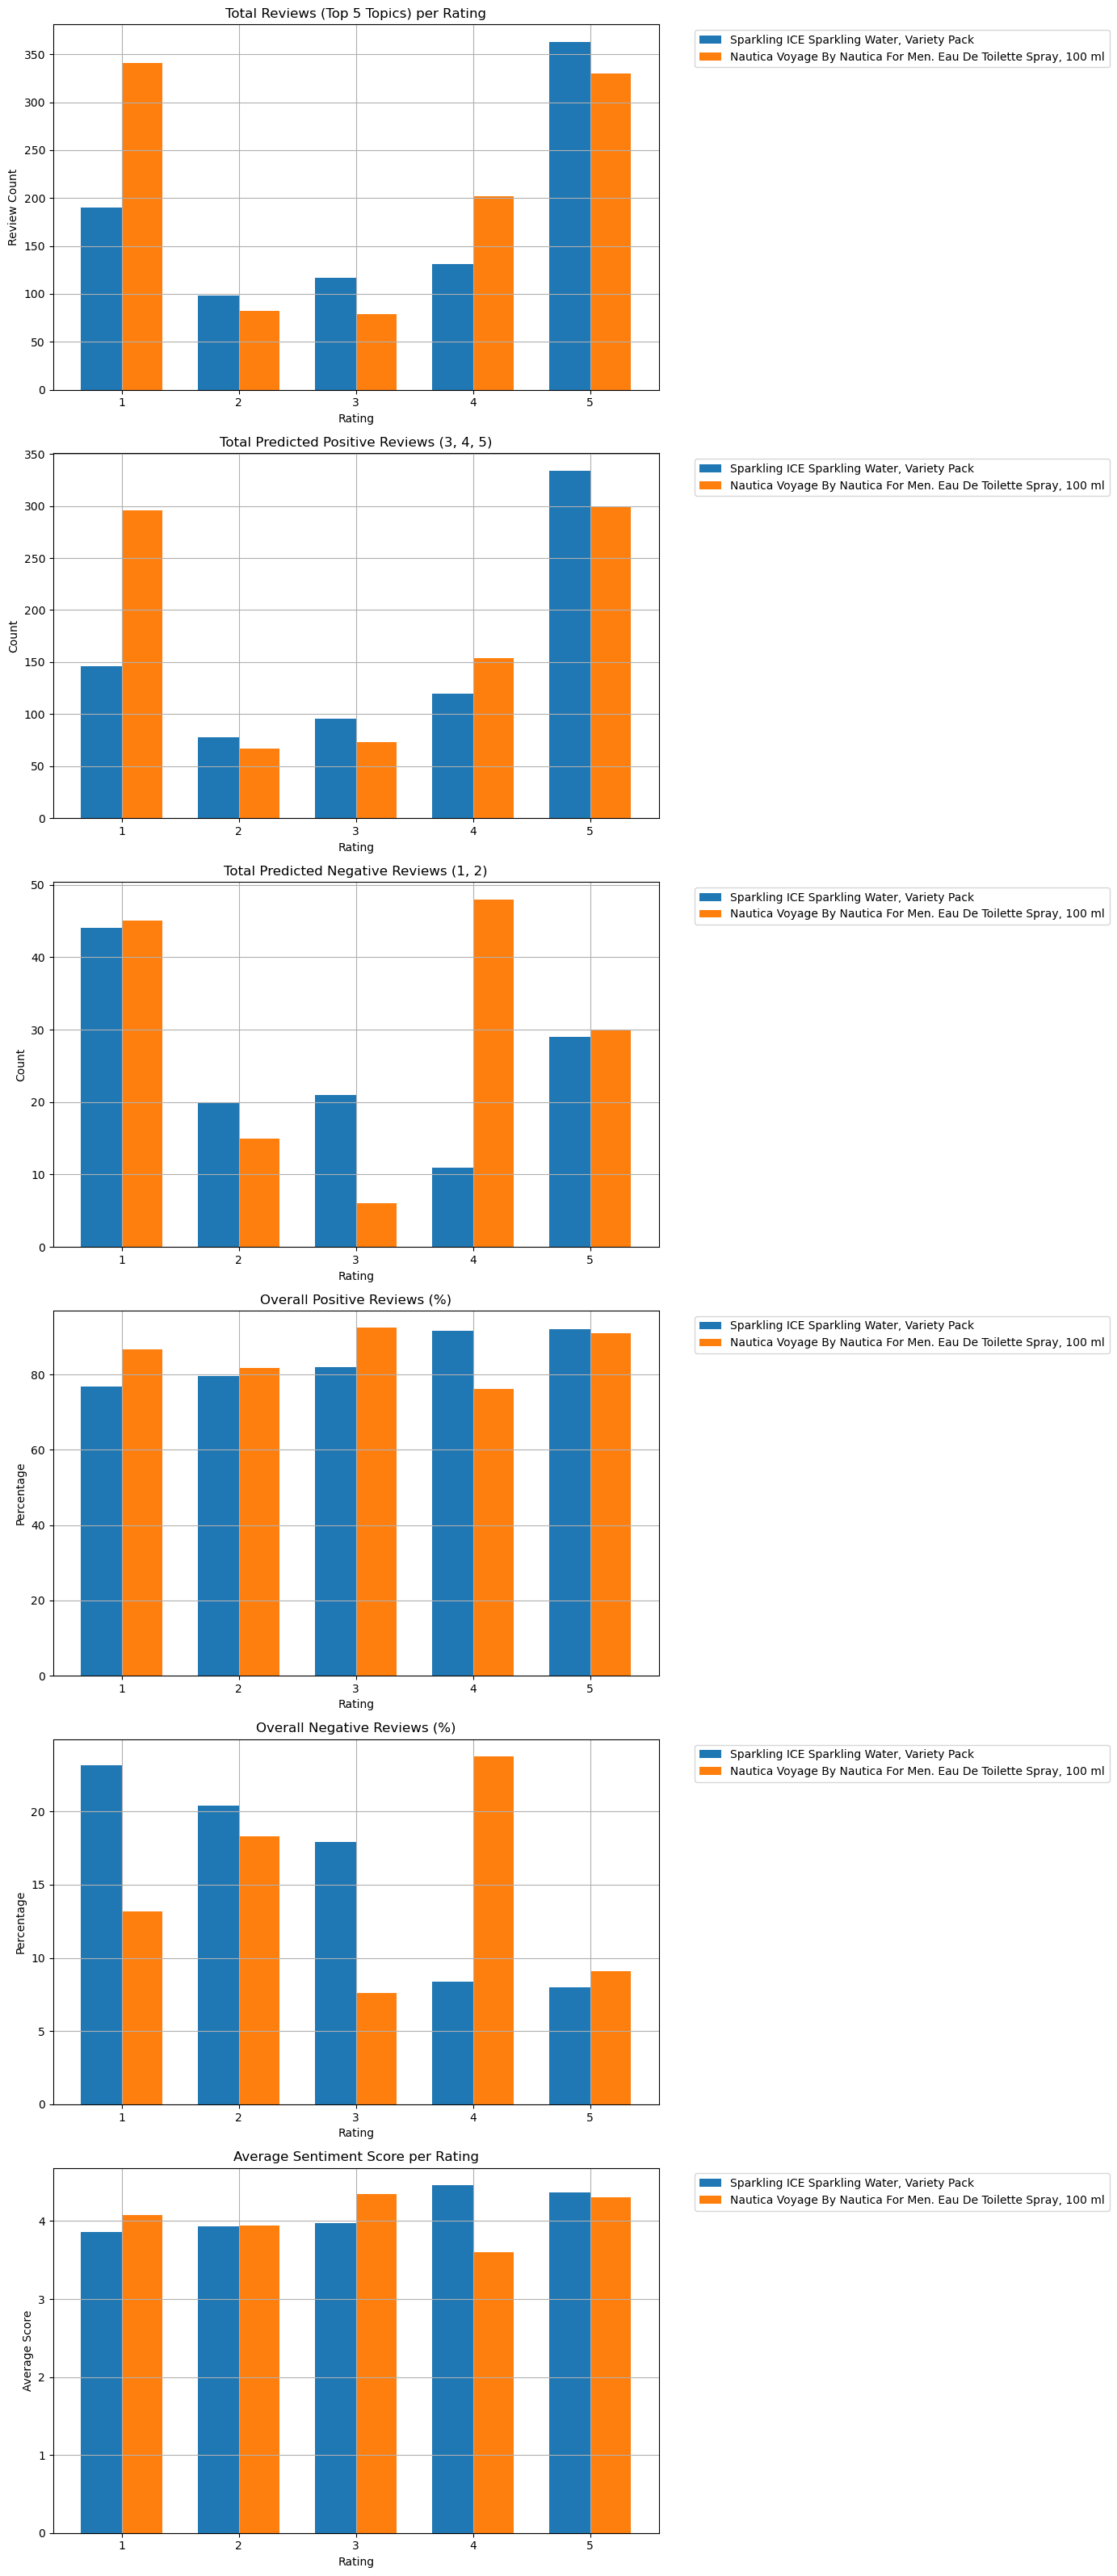

In [296]:
import matplotlib.pyplot as plt
import numpy as np

# Unique products and ratings
products = combined_sentiment_df["Product"].unique()
ratings = [1, 2, 3, 4, 5]
bar_width = 0.35
x = np.arange(len(ratings))

# Total plots: 6
fig, axs = plt.subplots(6, 1, figsize=(14, 32))
plt.subplots_adjust(hspace=0.5, right=0.75)

# Plot 1: Total Reviews (Top 5 Topics)
for i, product in enumerate(products):
    subset = combined_sentiment_df[combined_sentiment_df["Product"] == product]
    axs[0].bar(x + i * bar_width, subset["Total Reviews (Top 5 Topics)"], width=bar_width, label=product)
axs[0].set_title("Total Reviews (Top 5 Topics) per Rating")
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Review Count")
axs[0].set_xticks(x + bar_width / 2)
axs[0].set_xticklabels(ratings)
axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[0].grid(True)

# Plot 2a: Total Predicted Positive Reviews
for i, product in enumerate(products):
    subset = combined_sentiment_df[combined_sentiment_df["Product"] == product]
    axs[1].bar(x + i * bar_width, subset["Total Predicted Positive Reviews(3,4,5)"], width=bar_width, label=product)
axs[1].set_title("Total Predicted Positive Reviews (3, 4, 5)")
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Count")
axs[1].set_xticks(x + bar_width / 2)
axs[1].set_xticklabels(ratings)
axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].grid(True)

# Plot 2b: Total Predicted Negative Reviews
for i, product in enumerate(products):
    subset = combined_sentiment_df[combined_sentiment_df["Product"] == product]
    axs[2].bar(x + i * bar_width, subset["Total Predicted Negative Reviews(1,2)"], width=bar_width, label=product)
axs[2].set_title("Total Predicted Negative Reviews (1, 2)")
axs[2].set_xlabel("Rating")
axs[2].set_ylabel("Count")
axs[2].set_xticks(x + bar_width / 2)
axs[2].set_xticklabels(ratings)
axs[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[2].grid(True)

# Plot 3a: Overall Positive Review Percentage
for i, product in enumerate(products):
    subset = combined_sentiment_df[combined_sentiment_df["Product"] == product]
    axs[3].bar(x + i * bar_width, subset["Overall Positive Reviews (%)"], width=bar_width, label=product)
axs[3].set_title("Overall Positive Reviews (%)")
axs[3].set_xlabel("Rating")
axs[3].set_ylabel("Percentage")
axs[3].set_xticks(x + bar_width / 2)
axs[3].set_xticklabels(ratings)
axs[3].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[3].grid(True)

# Plot 3b: Overall Negative Review Percentage
for i, product in enumerate(products):
    subset = combined_sentiment_df[combined_sentiment_df["Product"] == product]
    axs[4].bar(x + i * bar_width, subset["Overall Negative Reviews (%)"], width=bar_width, label=product)
axs[4].set_title("Overall Negative Reviews (%)")
axs[4].set_xlabel("Rating")
axs[4].set_ylabel("Percentage")
axs[4].set_xticks(x + bar_width / 2)
axs[4].set_xticklabels(ratings)
axs[4].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[4].grid(True)

# Plot 4: Average Sentiment Score
for i, product in enumerate(products):
    subset = combined_sentiment_df[combined_sentiment_df["Product"] == product]
    axs[5].bar(x + i * bar_width, subset["Average Sentiment Score"], width=bar_width, label=product)
axs[5].set_title("Average Sentiment Score per Rating")
axs[5].set_xlabel("Rating")
axs[5].set_ylabel("Average Score")
axs[5].set_xticks(x + bar_width / 2)
axs[5].set_xticklabels(ratings)
axs[5].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[5].grid(True)

# Show all
plt.tight_layout()
plt.show()
